In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.6, color_codes=True)

#### To access MySQL database, do port forwarding (with a jump host) by running followinng command in a terminal
#### ssh -o "ServerAliveInterval 60" -L 127.0.0.1:3306:127.0.0.1:3306 -J fatma@idir.uta.edu fatma@idir-server2

In [3]:
import MySQLdb
db = MySQLdb.connect("127.0.0.1","factchecker","checkfact","factchecker_presidential_debate")
cursor = db.cursor()


In [4]:
#### Total number of Sentences (excluding 2016-10-04 Vice Presidential Debate sentences)
query = "SELECT COUNT(*) FROM Sentence WHERE file_id!='2016-10-04.txt';"
cursor.execute(query)

result = cursor.fetchall()
for row in result:
    print(row[0])

32072


In [5]:
#### Distribution of the sentences over speaker type 
query = "SELECT COUNT(*), role FROM Sentence, Speaker_File \
WHERE Sentence.file_id = Speaker_File.file_id  AND Sentence.speaker_id = Speaker_File.speaker_id \
AND Sentence.file_id!='2016-10-04.txt' \
GROUP BY role;"
cursor.execute(query)

result = cursor.fetchall()
for row in result:
    print(row)

(26322, 'Interviewee')
(4292, 'Moderator')
(1319, 'Questioner')


In [6]:
#### Number of sentences without a speaker name
query = "SELECT COUNT(*) \
FROM Sentence \
WHERE file_id!='2016-10-04.txt' \
AND speaker_id = '';"

cursor.execute(query)

result = cursor.fetchall()
for row in result:
    print(row[0])

139


In [7]:
#### Number of sentences less than 5 words
query = "SELECT COUNT(*) FROM Sentence, Speaker_File \
WHERE Sentence.file_id = Speaker_File.file_id  AND Sentence.speaker_id = Speaker_File.speaker_id \
AND Sentence.file_id!='2016-10-04.txt' \
AND role='Interviewee' \
AND length < 5;"

cursor.execute(query)

result = cursor.fetchall()
for row in result:
    print(row[0])

2789


In [8]:
######Sentence distribution among presidential debates
query = "SELECT Sentence.file_id AS 'Presidential Debate Date', COUNT(*) AS 'No. of Sentences'\
     FROM Sentence, Speaker_File WHERE \
     Sentence.file_id = Speaker_File.file_id AND Sentence.speaker_id = Speaker_File.speaker_id \
     AND Sentence.file_id != '2016-10-04.txt' \
     AND role = 'interviewee' AND length >= 5 GROUP BY Sentence.file_id ORDER BY Sentence.file_id;"
cursor.execute(query)

result = cursor.fetchall()
for row in result:
    print("{} - {}".format(row[0].replace(".txt", ""), row[1]))

1960-09-26 - 425
1960-10-07 - 432
1960-10-13 - 372
1960-10-21 - 456
1976-09-23 - 483
1976-10-06 - 472
1976-10-22 - 471
1980-09-21 - 337
1980-10-28 - 469
1984-10-07 - 599
1984-10-21 - 528
1988-09-25 - 721
1988-10-13 - 674
1992-10-11 - 823
1992-10-15 - 863
1992-10-19 - 849
1996-10-06 - 931
1996-10-16 - 874
2000-10-03 - 885
2000-10-11 - 822
2000-10-17 - 785
2004-09-30 - 873
2004-10-08 - 942
2004-10-13 - 830
2008-09-26 - 803
2008-10-07 - 714
2008-10-15 - 737
2012-10-03 - 837
2012-10-16 - 923
2012-10-22 - 858
2016-09-26 - 1012
2016-10-09 - 848
2016-10-19 - 885


In [9]:
######Average sentence length in words
query = "SELECT Sentence.file_id AS 'Presidential Debate Date', SUM(Sentence.length)/COUNT(*) AS 'Avg. Sentence Length'\
     FROM Sentence, Speaker_File WHERE \
     Sentence.file_id = Speaker_File.file_id AND Sentence.speaker_id = Speaker_File.speaker_id \
     AND role = 'Interviewee' AND length >= 5 GROUP BY Sentence.file_id ORDER BY Sentence.file_id;"
cursor.execute(query)

result = cursor.fetchall()
for row in result:
    print("{} - {}".format(row[0].replace(".txt", ""), row[1]))

1960-09-26 - 22.1812
1960-10-07 - 22.5810
1960-10-13 - 23.4140
1960-10-21 - 20.8816
1976-09-23 - 24.4389
1976-10-06 - 22.4386
1976-10-22 - 23.7665
1980-09-21 - 24.7685
1980-10-28 - 25.6311
1984-10-07 - 19.6127
1984-10-21 - 20.7898
1988-09-25 - 18.0014
1988-10-13 - 18.6261
1992-10-11 - 17.2321
1992-10-15 - 16.8088
1992-10-19 - 17.5053
1996-10-06 - 16.6122
1996-10-16 - 16.1167
2000-10-03 - 16.3017
2000-10-11 - 16.7932
2000-10-17 - 16.1669
2004-09-30 - 15.0389
2004-10-08 - 14.6051
2004-10-13 - 15.5253
2008-09-26 - 18.2279
2008-10-07 - 18.8669
2008-10-15 - 18.6621
2012-10-03 - 17.8411
2012-10-16 - 16.5049
2012-10-22 - 17.8834
2016-09-26 - 14.1354
2016-10-04 - 15.8856
2016-10-09 - 15.1333
2016-10-19 - 14.4045


In [10]:
# Overall Statistics of Participants
query = "select USERNAME,PROFESSION,RANK_E,RANK_W,ANSWERED as '#', A.SKIPPED/A.ANSWERED as SKIP, A.LEN, \
round(A.LEN/18.4217*A.ANSWERED*sign(0.3 - A.RANK_W)*pow((0.3 - A.RANK_W),2),2) AS RANK_L,\
if(ANSWERED >= 50, round(if( RANK_W <= 0, 3-7*RANK_W/0.2, if(RANK_W<=0.3, pow((0.3-RANK_W)/0.3, 2.5)*3, 0) ),2), 0) \
as Quality, \
if(ANSWERED >= 50, round(if( RANK_W <= 0, 3-7*RANK_W/0.2, if(RANK_W<=0.3, pow((0.3-RANK_W)/0.3, 2.5)*3, 0))\
*pow((A.LEN/18.4217), 1.5)*pow(0.6, A.SKIPPED/A.ANSWERED),2), 0) as PAYRATE,\
if(ANSWERED >= 50, round(if( RANK_W <= 0, 3-7*RANK_W/0.2, if(RANK_W<=0.3, \
pow((0.3-RANK_W)/0.3, 2.5)*3, 0) )*pow((A.LEN/18.4217), 1.5)*ANSWERED/100*pow(0.6, A.SKIPPED/A.ANSWERED),2), 0) \
as PAYMENT,\
    NFS,NO,YES,NFS_NFS,NFS_NO,NFS_YES,NO_NFS,NO_NO,NO_YES,YES_NFS,YES_NO,YES_YES \
    from (select \
    Sentence_User.username as USERNAME, profession as PROFESSION, \
    round((pow(sum(if(screening = -1 and response = -1, 1, 0))/sum(if(screening = -1 and response != -2, 1, 0))-sum(if(screening = 0 and response = -1, 1, 0))/sum(if(screening = 0 and response != -2, 1, 0)),2)+ \
    pow(sum(if(screening = -1 and response = 0, 1, 0))/sum(if(screening = -1 and response != -2, 1, 0))-sum(if(screening = 0 and response = 0, 1, 0))/sum(if(screening = 0 and response != -2, 1, 0)),2)+ \
    pow(sum(if(screening = -1 and response = 1, 1, 0))/sum(if(screening = -1 and response != -2, 1, 0))-sum(if(screening = 0 and response = 1, 1, 0))/sum(if(screening = 0 and response != -2, 1, 0)),2)+ \
    pow(sum(if(screening = -1 and response = -1, 1, 0))/sum(if(screening = -1 and response != -2, 1, 0))-sum(if(screening = 1 and response = -1, 1, 0))/sum(if(screening = 1 and response != -2, 1, 0)),2)+ \
    pow(sum(if(screening = -1 and response = 0, 1, 0))/sum(if(screening = -1 and response != -2, 1, 0))-sum(if(screening = 1 and response = 0, 1, 0))/sum(if(screening = 1 and response != -2, 1, 0)),2)+ \
    pow(sum(if(screening = -1 and response = 1, 1, 0))/sum(if(screening = -1 and response != -2, 1, 0))-sum(if(screening = 1 and response = 1, 1, 0))/sum(if(screening = 1 and response != -2, 1, 0)),2)+ \
    pow(sum(if(screening = 0 and response = -1, 1, 0))/sum(if(screening = 0 and response != -2, 1, 0))-sum(if(screening = 1 and response = -1, 1, 0))/sum(if(screening = 1 and response != -2, 1, 0)),2)+ \
    pow(sum(if(screening = 0 and response = 0, 1, 0))/sum(if(screening = 0 and response != -2, 1, 0))-sum(if(screening = 1 and response = 0, 1, 0))/sum(if(screening = 1 and response != -2, 1, 0)),2)+ \
    pow(sum(if(screening = 0 and response = 1, 1, 0))/sum(if(screening = 0 and response != -2, 1, 0))-sum(if(screening = 1 and response = 1, 1, 0))/sum(if(screening = 1 and response != -2, 1, 0)),2))/(3*2), 3) as RANK_E, \
    round(-0.2*(sum(if(screening = -1 and response = -1, 1, 0))+sum(if(screening = 0 and response = 0, 1, 0))+sum(if(screening = 1 and response = 1, 1, 0)))/(sum(screening != -3 and response != -2)) \
    +0.7*(sum(if(screening = 0 and response = 1, 1, 0))+sum(if(screening = 1 and response = 0, 1, 0)))/(sum(screening != -3 and response != -2)) \
    +0.7*(sum(if(screening = -1 and response = 0, 1, 0))+sum(if(screening = 0 and response = -1, 1, 0)))/(sum(screening != -3 and response != -2)) \
    +2.5*(sum(if(screening = -1 and response = 1, 1, 0))+sum(if(screening = 1 and response = -1, 1, 0)))/(sum(screening != -3 and response != -2)), 3) as RANK_W, \
    sum(if(Sentence_User.response != -2, 1, 0)) as ANSWERED, \
    sum(if(Sentence_User.response = -2, 1, 0)) as SKIPPED, \
    avg(if(Sentence_User.response != -2, length, null)) as LEN, \
    sum(if(response = -1,1,0)) as NFS, \
    sum(if(response = 0,1,0)) as NO, \
    sum(if(response = 1,1,0)) as YES, \
    sum(if(screening = -1 and response = -1, 1, 0)) as NFS_NFS, \
    sum(if(screening = -1 and response = 0, 1, 0)) as NFS_NO, \
    sum(if(screening = -1 and response = 1, 1, 0)) as NFS_YES, \
    sum(if(screening = 0 and response = -1, 1, 0)) as NO_NFS, \
    sum(if(screening = 0 and response = 0, 1, 0)) as NO_NO, \
    sum(if(screening = 0 and response = 1, 1, 0)) as NO_YES, \
    sum(if(screening = 1 and response = -1, 1, 0)) as YES_NFS,\
    sum(if(screening = 1 and response = 0, 1, 0)) as YES_NO,\
    sum(if(screening = 1 and response = 1, 1, 0)) as YES_YES\
    from Sentence_User, Sentence, User \
    where id = sentence_id and Sentence_User.username = User.username and \
    Sentence_User.username != 'factchecker' and \
    sentence_id not in (129, 1576, 3110, 3429, 4390, 5553, 5562, 5654, 5974, 6002, 6483, 7600, 9017, 9355, 9862, 10060, 10762, 10863, 11025, 11112, 14933, 611, 15445, 15602, 15763, 16014, 16015, 16258, 16828, 17000, 17159, 17420, 17509, 21636, 24352, 26145, 27100, 27828, 27986, 28777) \
    group by Sentence_User.username) A order by PAYMENT desc;"



overall_statistics = pd.read_sql_query(query, db)
overall_statistics.head()

USERNAME PROFESSION  RANK_E  RANK_W       #    SKIP      LEN   RANK_L  \
0      ftmdgn    Student   0.934  -0.174  5469.0  0.0424  19.9400  1330.03   
1    chengkai  Professor   0.892  -0.177  4679.0  0.0543  17.7666  1026.75   
2  kamivinton    Student   0.831  -0.128  4964.0  0.0514  18.8977   932.82   
3    sumeshnb    Student   0.792  -0.118  4325.0  0.0449  20.6220   845.94   
4     farslan    Student   0.968  -0.192  3773.0  0.0008  15.2226   754.70   

   Quality  PAYRATE   ...        YES  NFS_NFS  NFS_NO  NFS_YES  NO_NFS  NO_NO  \
0     9.09    10.02   ...     1143.0    249.0     1.0      0.0     2.0   52.0   
1     9.20     8.47   ...     1248.0    611.0     2.0      2.0     1.0   50.0   
2     7.48     7.57   ...     1051.0    347.0     2.0      4.0     1.0   44.0   
3     7.13     8.25   ...      937.0    218.0     0.0      1.0     4.0   39.0   
4     9.72     7.30   ...     1016.0    163.0     1.0      0.0     0.0   52.0   

   NO_YES  YES_NFS  YES_NO  YES_YES  
0     0.0      3.0     1.0    150.0  
1     4.0      3.0     0.0    186.0  
2     3.0      7.0     3.0    117.0  
3     2.0      8.0     2.0    110.0  
4     1.0      0.0     1.0    137.0  

[5 rows x 23 columns]

/Users/fatma/.pyenv/versions/3.6.4/lib/python3.6/site-packages/numpy/lib/histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/fatma/.pyenv/versions/3.6.4/lib/python3.6/site-packages/numpy/lib/histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


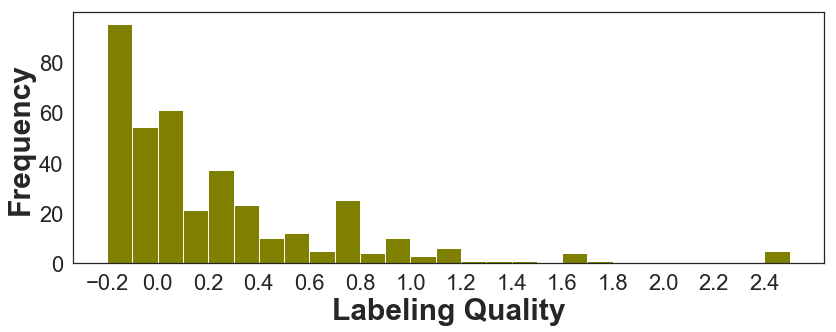

In [11]:
####Participants' Labeling Quality
sns.set_style(style='white')
fig, ax = plt.subplots(figsize=(12,5))


xlabels=[-0.2, 0.0,0.2, 0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4]
plt.xticks(xlabels)
ylabels = [l*10 for l in range(0,12) if l%2 == 0]
plt.yticks(ylabels)
ax = sns.distplot(overall_statistics.RANK_W, kde=False, bins = 27, hist_kws={"color": "olive", "alpha": 1.0})

ax.set_xlabel("Labeling Quality", fontsize=30, fontweight='bold')
ax.set_ylabel("Frequency", fontsize=30, fontweight='bold')

plt.tick_params(labelsize=22)
plt.tight_layout()

plt.savefig('labeling_quality.png', bbox_inches='tight')

In [12]:
#### Select Top-quality Participants
query = "select Sentence_User.username as USERNAME from Sentence_User, Sentence \
where id = sentence_id and username not in ('cmavs2015', 'sakiforu', 'teaphony') and response != -2 and \
sentence_id not in (129, 1576, 3110, 3429, 4390, 5553, 5562, 5654, 5974, 6002, 6483, 7600, 9017, 9355, 9862, \
10060, 10762, 10863, 11025, 11112, 14933, 611, 15445, 15602, 15763, 16014, 16015, 16258, 16828, 17000, 17159, \
17420, 17509, 21636, 24352, 26145, 27100, 27828, 27986, 28777) \
group by Sentence_User.username having \
-0.2*(sum(if(screening = -1 and response = -1, 1, 0))+sum(if(screening = 0 and response = 0, 1, 0))+sum(if(screening = 1 and response = 1, 1, 0)))/(sum(screening != -3 and response != -2)) \
+0.7*(sum(if(screening = 0 and response = 1, 1, 0))+sum(if(screening = 1 and response = 0, 1, 0)))/(sum(screening != -3 and response != -2)) \
+0.7*(sum(if(screening = -1 and response = 0, 1, 0))+sum(if(screening = 0 and response = -1, 1, 0)))/(sum(screening != -3 and response != -2)) \
+2.5*(sum(if(screening = -1 and response = 1, 1, 0))+sum(if(screening = 1 and response = -1, 1, 0)))/(sum(screening != -3 and response != -2)) <= 0.0 and count(*) >= 50;"

cursor.execute(query)
#print (query)
result = cursor.fetchall()
top_quality_participants = []
for row in result:
    top_quality_participants.append(row[0])
print(top_quality_participants)

['66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', 'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', 'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', 'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', 'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', 'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', 'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 

In [13]:
#####Number of sentences vs number of user skip
query = "SELECT total, count(total), sum(avg_len)/count(total) as avg_length FROM (SELECT count(sentence_id) as total, \
sum(length)/count(length) as avg_len \
FROM Sentence, Sentence_User \
WHERE id=sentence_id AND response=-2 AND screening=-3 \
AND username IN ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', 'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', 'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', 'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', 'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', 'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', 'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', 'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', 'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', 'yusufertun', 'zwj') \
AND username!='test' AND file_id!='2016-10-04.txt' GROUP BY sentence_id) A GROUP BY total;"


cursor.execute(query)

result = cursor.fetchall()
for row in result:
    print(row[0],row[1],row[2])

1 3685 19.31641791
2 743 21.27321669
3 155 25.16129032
4 32 24.93750000
5 7 26.71428571
6 3 35.00000000
7 2 62.50000000


In [14]:
#####Total number of sentences vs number of user skip
query = "SELECT count(total) FROM (SELECT count(sentence_id) as total FROM Sentence, Sentence_User \
WHERE id=sentence_id AND response=-2 AND screening=-3 \
AND username IN ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', 'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', 'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', 'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', 'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', 'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', 'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', 'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', 'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', 'yusufertun', 'zwj') \
AND username!='test' AND file_id!='2016-10-04.txt' GROUP BY sentence_id) A ;"


cursor.execute(query)

result = cursor.fetchall()
for row in result:
    print(row[0])

4627


In [15]:
##### Average length of the all sentences
query="select sum(length)/count(*) from Sentence, Sentence_User \
where id=sentence_id \
AND username IN ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', 'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', 'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', 'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', 'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', 'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', 'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', 'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', 'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', 'yusufertun', 'zwj') \
AND screening=-1;"

cursor.execute(query)

result = cursor.fetchall()
for row in result:
    print(row[0])

14.5710


In [16]:
##### Sentences that were skipped by top quality users more than five times
query = "SELECT sentence_id, text, total FROM (SELECT sentence_id, text, count(*) as total \
FROM Sentence, Sentence_User \
WHERE id=sentence_id AND response=-2 AND screening=-3 \
AND username IN ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', 'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', 'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', 'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', 'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', 'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', 'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', 'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', 'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', 'yusufertun', 'zwj') \
AND username!='test' AND file_id!='2016-10-04.txt' GROUP BY sentence_id) A WHERE total>=6 order by total;"


cursor.execute(query)

result = cursor.fetchall()
for row in result:
    print(row)

(14452, "We don't want to overreact, as the federal regulators have in my judgment, on good banks so that they've created credit crunches, that is, they have made our recession worse in the last couple of years -- but we do want to act prudently with the banks that are in trouble.", 6)
(13088, 'As a matter of fact, the statement that Senator Kennedy made was that - to the effect that there were trigger-happy Republicans, that my stand on Quemoy and Matsu was an indication of trigger-happy Republicans.', 6)
(14261, 'I would like the record to show the panelists that Ross Perot took the first shot at the press.', 6)
(14446, 'Gene, there is a problem in the sense that there are some problem banks, and on December 19th new regulations will go into effect which will in effect give the government the responsibility to close some banks that are not technically insolvent but that are plainly in trouble.', 7)
(13911, "You implement that NAFTA, the Mexican trade agreement, where they pay people 

In [17]:
#####Number of User Responses vs NFS
query="select total, count(total) from (select sentence_id, count(*) as total \
from Sentence, Sentence_User, Speaker_File \
where id=sentence_id and Sentence.file_id = Speaker_File.file_id and Sentence.speaker_id = Speaker_File.speaker_id \
and Speaker_File.role = 'Interviewee' and response!=-2 and Sentence.file_id!='2016-10-04.txt' and \
username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
'yusufertun', 'zwj') \
and screening=-3 group by sentence_id) B where B.sentence_id in (SELECT id FROM (SELECT id, file_id, \
SUM(IF(response = - 1, 1, 0)) AS nfs, \
SUM(IF(response = 0, 1, 0)) AS ufs, \
SUM(IF(response = 1, 1, 0)) AS cfs, -1 as verdict \
FROM Sentence_User, Sentence \
WHERE Sentence.id = Sentence_User.sentence_id \
AND screening = - 3 \
AND username IN ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', 'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', 'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', 'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', 'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', 'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', 'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', 'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', 'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', 'yusufertun', 'zwj') \
GROUP BY sentence_id \
HAVING (nfs >= 2 \
AND nfs > (nfs + ufs + cfs)/2)) A WHERE A.verdict = -1) group by total \
UNION \
select total, count(total) from (select sentence_id, count(*) as total \
from Sentence, Sentence_User, Speaker_File \
where id=sentence_id and Sentence.file_id = Speaker_File.file_id and Sentence.speaker_id = Speaker_File.speaker_id \
and Speaker_File.role = 'Interviewee' and response!=-2 and Sentence.file_id!='2016-10-04.txt' and \
username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
'yusufertun', 'zwj') \
and screening=-3 group by sentence_id) B where B.sentence_id in (SELECT id FROM (SELECT id, file_id, \
SUM(IF(response = - 1, 1, 0)) AS nfs, \
SUM(IF(response = 0, 1, 0)) AS ufs, \
SUM(IF(response = 1, 1, 0)) AS cfs, -1 as verdict \
FROM Sentence_User, Sentence \
WHERE Sentence.id = Sentence_User.sentence_id \
AND screening = - 3 \
AND username IN ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', 'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', 'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', 'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', 'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', 'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', 'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', 'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', 'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', 'yusufertun', 'zwj') \
GROUP BY sentence_id \
HAVING (nfs >cfs AND nfs>ufs AND nfs<=(nfs + ufs + cfs)/2)) B WHERE B.verdict = -1) group by total \
;"    



cursor.execute(query)
#print (query)
result = cursor.fetchall()
for row in result:
    print(row)


(2, 9388)
(3, 4545)
(4, 224)
(5, 309)
(6, 6)
(7, 88)
(8, 3)
(9, 28)
(11, 12)
(13, 20)
(15, 11)
(17, 1)
(6, 4)
(7, 1)
(14, 6)
(15, 14)
(16, 17)
(17, 7)
(18, 1)


In [18]:
#####Number of User Responses vs UFS
query="select total, count(total) from (select sentence_id, count(*) as total \
from Sentence, Sentence_User, Speaker_File \
where id=sentence_id and Sentence.file_id = Speaker_File.file_id and Sentence.speaker_id = Speaker_File.speaker_id \
and Speaker_File.role = 'Interviewee' and response!=-2 and Sentence.file_id!='2016-10-04.txt' and \
username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
'yusufertun', 'zwj') \
and screening=-3 group by sentence_id) B where B.sentence_id in (SELECT id FROM (SELECT id, file_id, \
SUM(IF(response = - 1, 1, 0)) AS nfs, \
SUM(IF(response = 0, 1, 0)) AS ufs, \
SUM(IF(response = 1, 1, 0)) AS cfs, 0 as verdict \
FROM Sentence_User, Sentence \
WHERE Sentence.id = Sentence_User.sentence_id \
AND screening = - 3 \
AND username IN ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', 'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', 'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', 'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', 'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', 'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', 'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', 'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', 'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', 'yusufertun', 'zwj') \
GROUP BY sentence_id \
HAVING (ufs >= 2 \
AND ufs > (nfs + ufs + cfs)/2)) A WHERE A.verdict = 0) group by total \
UNION \
select total, count(total) from (select sentence_id, count(*) as total \
from Sentence, Sentence_User, Speaker_File \
where id=sentence_id and Sentence.file_id = Speaker_File.file_id and Sentence.speaker_id = Speaker_File.speaker_id \
and Speaker_File.role = 'Interviewee' and response!=-2 and Sentence.file_id!='2016-10-04.txt' and \
username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
'yusufertun', 'zwj') \
and screening=-3 group by sentence_id) B where B.sentence_id in (SELECT id FROM (SELECT id, file_id, \
SUM(IF(response = - 1, 1, 0)) AS nfs, \
SUM(IF(response = 0, 1, 0)) AS ufs, \
SUM(IF(response = 1, 1, 0)) AS cfs, 0 as verdict \
FROM Sentence_User, Sentence \
WHERE Sentence.id = Sentence_User.sentence_id \
AND screening = - 3 \
AND username IN ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', 'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', 'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', 'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', 'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', 'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', 'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', 'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', 'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', 'yusufertun', 'zwj') \
GROUP BY sentence_id \
HAVING (ufs>cfs AND ufs>=nfs AND ufs<=(nfs + ufs + cfs)/2)) B WHERE B.verdict = 0) group by total \
;"    



cursor.execute(query)
#print (query)
result = cursor.fetchall()
for row in result:
    print(row)


(2, 844)
(3, 1192)
(4, 40)
(5, 152)
(6, 2)
(7, 41)
(8, 1)
(9, 26)
(11, 11)
(13, 9)
(14, 1)
(15, 7)
(16, 1)
(17, 1)
(4, 3)
(5, 3)
(6, 5)
(7, 2)
(11, 1)
(13, 1)
(14, 8)
(15, 10)
(16, 25)
(17, 15)
(18, 1)


In [19]:
#####Number of User Responses vs CFS
query="select total, count(total) from (select sentence_id, count(*) as total \
from Sentence, Sentence_User, Speaker_File \
where id=sentence_id and Sentence.file_id = Speaker_File.file_id and Sentence.speaker_id = Speaker_File.speaker_id \
and Speaker_File.role = 'Interviewee' and response!=-2 and Sentence.file_id!='2016-10-04.txt' and \
username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
'yusufertun', 'zwj') \
and screening=-3 group by sentence_id) B where B.sentence_id in (SELECT id FROM (SELECT id, file_id, \
SUM(IF(response = - 1, 1, 0)) AS nfs, \
SUM(IF(response = 0, 1, 0)) AS ufs, \
SUM(IF(response = 1, 1, 0)) AS cfs, 1 as verdict \
FROM Sentence_User, Sentence \
WHERE Sentence.id = Sentence_User.sentence_id \
AND screening = - 3 \
AND username IN ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', 'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', 'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', 'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', 'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', 'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', 'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', 'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', 'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', 'yusufertun', 'zwj') \
GROUP BY sentence_id \
HAVING (cfs >= 2 \
AND cfs > (nfs + ufs + cfs)/2)) A WHERE A.verdict = 1) group by total \
UNION \
select total, count(total) from (select sentence_id, count(*) as total \
from Sentence, Sentence_User, Speaker_File \
where id=sentence_id and Sentence.file_id = Speaker_File.file_id and Sentence.speaker_id = Speaker_File.speaker_id \
and Speaker_File.role = 'Interviewee' and response!=-2 and Sentence.file_id!='2016-10-04.txt' and \
username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
'yusufertun', 'zwj') \
and screening=-3 group by sentence_id) B where B.sentence_id in (SELECT id FROM (SELECT id, file_id, \
SUM(IF(response = - 1, 1, 0)) AS nfs, \
SUM(IF(response = 0, 1, 0)) AS ufs, \
SUM(IF(response = 1, 1, 0)) AS cfs, 1 as verdict \
FROM Sentence_User, Sentence \
WHERE Sentence.id = Sentence_User.sentence_id \
AND screening = - 3 \
AND username IN ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', 'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', 'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', 'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', 'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', 'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', 'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', 'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', 'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', 'yusufertun', 'zwj') \
GROUP BY sentence_id \
HAVING (cfs>=ufs AND cfs>=nfs AND cfs<=(nfs + ufs + cfs)/2)) B WHERE B.verdict = 1) group by total \
;"    



cursor.execute(query)
#print (query)
result = cursor.fetchall()
for row in result:
    print(row)



(2, 2824)
(3, 2128)
(4, 65)
(5, 169)
(6, 3)
(7, 77)
(8, 3)
(9, 17)
(11, 17)
(12, 2)
(13, 6)
(14, 1)
(15, 5)
(17, 1)
(5, 7)
(6, 9)
(8, 2)
(13, 3)
(14, 9)
(15, 21)
(16, 32)
(17, 10)
(18, 2)


In [20]:
query = "SELECT Sentence_User.sentence_id as Sentence_id, text as Text, Speaker.name as Speaker, \
Speaker_File.title as Speaker_title, \
Speaker.party as Speaker_party, Sentence.file_id as File_id, \
length as Length, line_number as Line_number, sentiment as Sentiment,  \
SUM(IF(response = - 1, 1, 0)) AS nfs, \
SUM(IF(response = 0, 1, 0)) AS ufs, \
SUM(IF(response = 1, 1, 0)) AS cfs, -1 as Verdict \
FROM Sentence_User, Sentence, Speaker_File, Speaker \
WHERE Sentence.id = Sentence_User.sentence_id \
AND Sentence.file_id = Speaker_File.file_id \
AND Sentence.speaker_id = Speaker_File.speaker_id \
AND Speaker.id = Speaker_File.speaker_id \
AND Sentence.file_id!='2016-10-04.txt' \
AND screening = - 3 \
AND username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
'yusufertun', 'zwj') \
GROUP BY Sentence_User.sentence_id \
HAVING (nfs >= 2 \
AND nfs > (nfs + ufs + cfs)/2) \
UNION \
SELECT Sentence_User.sentence_id as Sentence_id, text as Text, Speaker.name as Speaker, \
Speaker_File.title as Speaker_title, \
Speaker.party as Speaker_party, Sentence.file_id as File_id, \
length as Length, line_number as Line_number, sentiment as Sentiment,  \
SUM(IF(response = - 1, 1, 0)) AS nfs, \
SUM(IF(response = 0, 1, 0)) AS ufs, \
SUM(IF(response = 1, 1, 0)) AS cfs, 0 as Verdict \
FROM Sentence_User, Sentence, Speaker_File, Speaker \
WHERE Sentence.id = Sentence_User.sentence_id \
AND Sentence.file_id = Speaker_File.file_id \
AND Sentence.speaker_id = Speaker_File.speaker_id \
AND Speaker.id = Speaker_File.speaker_id \
AND Sentence.file_id!='2016-10-04.txt' \
AND screening = - 3 \
AND username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
'yusufertun', 'zwj') \
GROUP BY Sentence_User.sentence_id \
HAVING (ufs >= 2 \
AND ufs > (nfs + ufs + cfs)/2) \
UNION \
SELECT Sentence_User.sentence_id as Sentence_id, text as Text, Speaker.name as Speaker, \
Speaker_File.title as Speaker_title, \
Speaker.party as Speaker_party, Sentence.file_id as File_id, \
length as Length, line_number as Line_number, sentiment as Sentiment,  \
SUM(IF(response = - 1, 1, 0)) AS nfs, \
SUM(IF(response = 0, 1, 0)) AS ufs, \
SUM(IF(response = 1, 1, 0)) AS cfs, 1 as Verdict \
FROM Sentence_User, Sentence, Speaker_File, Speaker \
WHERE Sentence.id = Sentence_User.sentence_id \
AND Sentence.file_id = Speaker_File.file_id \
AND Sentence.speaker_id = Speaker_File.speaker_id \
AND Speaker.id = Speaker_File.speaker_id \
AND Sentence.file_id!='2016-10-04.txt' \
AND screening = - 3 \
AND username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
'yusufertun', 'zwj') \
GROUP BY Sentence_User.sentence_id \
HAVING (cfs >= 2 \
AND cfs > (nfs + ufs + cfs)/2) \
UNION \
SELECT Sentence_User.sentence_id as Sentence_id, text as Text, Speaker.name as Speaker, \
Speaker_File.title as Speaker_title, \
Speaker.party as Speaker_party, Sentence.file_id as File_id, \
length as Length, line_number as Line_number, sentiment as Sentiment,  \
SUM(IF(response = - 1, 1, 0)) AS nfs, \
SUM(IF(response = 0, 1, 0)) AS ufs, \
SUM(IF(response = 1, 1, 0)) AS cfs, 1 as Verdict \
FROM Sentence_User, Sentence, Speaker_File, Speaker \
WHERE Sentence.id = Sentence_User.sentence_id \
AND Sentence.file_id = Speaker_File.file_id \
AND Sentence.speaker_id = Speaker_File.speaker_id \
AND Speaker.id = Speaker_File.speaker_id \
AND Sentence.file_id!='2016-10-04.txt' \
AND screening = - 3 \
AND username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
'yusufertun', 'zwj') \
GROUP BY Sentence_User.sentence_id \
HAVING ((cfs+ufs+nfs)>=5 and cfs>=ufs and cfs>=nfs and cfs <= (nfs + ufs + cfs)/2) \
UNION \
SELECT Sentence_User.sentence_id as Sentence_id, text as Text, Speaker.name as Speaker, \
Speaker_File.title as Speaker_title, \
Speaker.party as Speaker_party, Sentence.file_id as File_id, \
length as Length, line_number as Line_number, sentiment as Sentiment,  \
SUM(IF(response = - 1, 1, 0)) AS nfs, \
SUM(IF(response = 0, 1, 0)) AS ufs, \
SUM(IF(response = 1, 1, 0)) AS cfs, 0 as Verdict \
FROM Sentence_User, Sentence, Speaker_File, Speaker \
WHERE Sentence.id = Sentence_User.sentence_id \
AND Sentence.file_id = Speaker_File.file_id \
AND Sentence.speaker_id = Speaker_File.speaker_id \
AND Speaker.id = Speaker_File.speaker_id \
AND Sentence.file_id!='2016-10-04.txt' \
AND screening = - 3 \
AND username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
'yusufertun', 'zwj') \
GROUP BY Sentence_User.sentence_id \
HAVING (ufs>cfs and ufs>=nfs and ufs <= (nfs + ufs + cfs)/2) \
UNION \
SELECT Sentence_User.sentence_id as Sentence_id, text as Text, Speaker.name as Speaker, \
Speaker_File.title as Speaker_title, \
Speaker.party as Speaker_party, Sentence.file_id as File_id, \
length as Length, line_number as Line_number, sentiment as Sentiment,  \
SUM(IF(response = - 1, 1, 0)) AS nfs, \
SUM(IF(response = 0, 1, 0)) AS ufs, \
SUM(IF(response = 1, 1, 0)) AS cfs, -1 as Verdict \
FROM Sentence_User, Sentence, Speaker_File, Speaker \
WHERE Sentence.id = Sentence_User.sentence_id \
AND Sentence.file_id = Speaker_File.file_id \
AND Sentence.speaker_id = Speaker_File.speaker_id \
AND Speaker.id = Speaker_File.speaker_id \
AND Sentence.file_id!='2016-10-04.txt' \
AND screening = - 3 \
AND username in ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', \
'Arnav', 'axg3022', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', \
'CodyBonBon', 'connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', \
'dylan.bradley', 'etown888', 'facse', 'factchecker', 'farslan', 'farz2017', 'fenlu', 'ftmdgn', \
'gensheng.zhang', 'gryder', 'GuanyueBian', 'hmwaterman', 'hxm2628', 'ijd1880', 'isai17', 'ishwor', \
'israa.jaradat', 'j.kathryn', 'james12', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', \
'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', \
'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', \
'NIGESH', 'nils.lindroth', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rjb6971', 'rohit', 'rpadilam', \
'ruchitengse', 'sam042', 'sami001', 'sarika3392', 'Shadek', 'shingaviaa', 'Shivangi27', 'shixiao9941', \
'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', \
'TheMagnusOpus', 'thesamhale', 'ttb', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', \
'yusufertun', 'zwj') \
GROUP BY Sentence_User.sentence_id \
HAVING (nfs>cfs and nfs>ufs and nfs <= (nfs + ufs + cfs)/2) \
;"



crowdsourced_df = pd.read_sql_query(query, db)
crowdsourced_df.head()


Sentence_id                                               Text  \
0           16      I think we've seen a deterioration of values.   
1           17  I think for a while as a nation we condoned th...   
2           18  For a while, as I recall, it even seems to me ...   
3           19  So we've seen a deterioration in values, and o...   
4           20  We got away, we got into this feeling that val...   

       Speaker   Speaker_title Speaker_party         File_id  Length  \
0  George Bush  Vice President    REPUBLICAN  1988-09-25.txt       8   
1  George Bush  Vice President    REPUBLICAN  1988-09-25.txt      16   
2  George Bush  Vice President    REPUBLICAN  1988-09-25.txt      29   
3  George Bush  Vice President    REPUBLICAN  1988-09-25.txt      35   
4  George Bush  Vice President    REPUBLICAN  1988-09-25.txt      15   

   Line_number  Sentiment  nfs  ufs  cfs  Verdict  
0           16   0.000000  2.0  0.0  0.0       -1  
1           17  -0.456018  2.0  0.0  0.0       -1  
2           18  -0.805547  2.0  0.0  0.0       -1  
3           19   0.698942  2.0  0.0  1.0       -1  
4           20   0.000000  2.0  0.0  0.0       -1

In [22]:
###### Drop'nfs', 'ufs', 'cfs' columns and save the results in a csv file
dfc=crowdsourced_df.drop(['nfs', 'ufs', 'cfs'], axis=1)
#print(len(dfc))
dfc['File_id'] = dfc['File_id'].astype('str')
dfc['File_id'] = dfc['File_id'].str.replace("b'", "")
dfc['File_id'] = dfc['File_id'].str.replace("'", "")
dfc['Line_number'] = dfc['Line_number'].astype('str')
dfc['Line_number'] = dfc['Line_number'].str.replace("b'", "")
dfc['Line_number'] = dfc['Line_number'].str.replace("'", "")



# Sort the rows of dataframe by column 'Name' in descending order
dfc = dfc.sort_values(by ='Sentence_id' , ascending=True)
#df1.to_csv ('crowdsourced.csv', index = None, header=True)


In [23]:
###### Ground-truth sentences labeled by three experts
###################################################################
query = "SELECT Sentence.id as Sentence_id, text as Text, Speaker.name as Speaker, \
Speaker_File.title as Speaker_title, \
Speaker.party as Speaker_party, Sentence.file_id as File_id, \
length as Length, line_number as Line_number, sentiment as Sentiment,  \
screening as Verdict \
FROM Sentence, Speaker_File, Speaker \
WHERE Sentence.file_id = Speaker_File.file_id \
AND Sentence.speaker_id = Speaker_File.speaker_id \
AND Speaker.id = Speaker_File.speaker_id \
AND screening in (-1,0,1) \
GROUP BY Sentence.id;"

groundtruth_df = pd.read_sql_query(query, db)
groundtruth_df.head()


Sentence_id                                               Text  \
0           26      You know, I saw a movie - "Crocodile Dundee."   
1           80  We're consuming 50 percent of the world's coca...   
2          129   That answer was about as clear as Boston harbor.   
3          131                          Let me help the governor.   
4          172  We've run up more debt in the last eight years...   

           Speaker   Speaker_title Speaker_party         File_id  Length  \
0      George Bush  Vice President    REPUBLICAN  1988-09-25.txt       9   
1  Michael Dukakis        Governor      DEMOCRAT  1988-09-25.txt       8   
2      George Bush  Vice President    REPUBLICAN  1988-09-25.txt       9   
3      George Bush  Vice President    REPUBLICAN  1988-09-25.txt       5   
4  Michael Dukakis        Governor      DEMOCRAT  1988-09-25.txt      22   

   Line_number  Sentiment  Verdict  
0           26   0.000000        0  
1           80  -0.740979        1  
2          129   0.000000       -1  
3          131   0.212987       -1  
4          172  -0.268506        1

In [24]:
##### Save the results in a csv file
print(len(groundtruth_df))
#groundtruth_df.to_csv ('groundtruth.csv', index = None, header=True)

1032


In [25]:
###### All sentences from all general election presidential debates
###################################################################
query = "SELECT Sentence.id as Sentence_id, text as Text, Speaker.name as Speaker, Speaker_File.title as Speaker_title, \
Speaker.party as Speaker_party, Speaker_File.role as Speaker_role, Sentence.file_id as File_id, \
length as Length, line_number as Line_number, sentiment as Sentiment  \
FROM Sentence, Speaker_File, Speaker \
WHERE Sentence.file_id = Speaker_File.file_id \
AND Sentence.speaker_id = Speaker_File.speaker_id \
AND Speaker.id = Speaker_File.speaker_id \
AND Sentence.file_id!='2016-10-04.txt' \
UNION \
SELECT Sentence.id as Sentence_id, text as Text, Speaker.name as Speaker, 'None' as Speaker_title, \
'None' as Speaker_party, 'None' as Speaker_role, Sentence.file_id as File_id, \
length as Length, line_number as Line_number, sentiment as Sentiment  \
FROM Sentence, Speaker \
WHERE Sentence.speaker_id = Speaker.id \
AND Sentence.file_id!='2016-10-04.txt' \
AND Sentence.speaker_id=0;"

all_sentences_df = pd.read_sql_query(query, db)
all_sentences_df.head()



Sentence_id                                               Text     Speaker  \
0            3                                      Good evening.  Jim Lehrer   
1            4  On behalf of the Commission on Presidential De...  Jim Lehrer   
2            5     I'm Jim Lehrer of the McNeil-Lehrer News Hour.  Jim Lehrer   
3            6  My colleagues on the panel are John Mashek of ...  Jim Lehrer   
4            7  For the next 90 minutes we will be questioning...  Jim Lehrer   

  Speaker_title Speaker_party Speaker_role         File_id  Length  \
0                        None    Moderator  1988-09-25.txt       2   
1                        None    Moderator  1988-09-25.txt      23   
2                        None    Moderator  1988-09-25.txt       8   
3                        None    Moderator  1988-09-25.txt      24   
4                        None    Moderator  1988-09-25.txt      30   

   Line_number  Sentiment  
0            3   0.343189  
1            4   0.810043  
2            5   0.000000  
3            6   0.000000  
4            7   0.223190

In [26]:
######## Change 'Interviewee' to 'Candidate' and save the results
all_sentences_df.loc[all_sentences_df.Speaker_role == 'Interviewee', 'Speaker_role'] = 'Candidate'
all_sentences_df = all_sentences_df.sort_values(by ='Sentence_id' , ascending=True)
print(len(all_sentences_df))
#all_sentences_df.to_csv ('all_sentences.csv', index = None, header=True)

32072


In [27]:
### Distribution of CFS over presidential debates
crowdsourced_df[crowdsourced_df['Verdict']==1].groupby('File_id').count()

Sentence_id  Text  Speaker  Speaker_title  Speaker_party  \
File_id                                                                    
1960-09-26.txt          101   101      101            101            101   
1960-10-07.txt           95    95       95             95             95   
1960-10-13.txt           94    94       94             94             94   
1960-10-21.txt           98    98       98             98             98   
1976-09-23.txt          168   168      168            168            168   
1976-10-06.txt          136   136      136            136            136   
1976-10-22.txt          126   126      126            126            126   
1980-09-21.txt           96    96       96             96             96   
1980-10-28.txt          154   154      154            154            154   
1984-10-07.txt          157   157      157            157            157   
1984-10-21.txt          126   126      126            126            126   
1988-09-25.txt           96    96       96             96             96   
1988-10-13.txt           87    87       87             87             87   
1992-10-11.txt          121   121      121            121            121   
1992-10-15.txt          151   151      151            151            151   
1992-10-19.txt          201   201      201            201            201   
1996-10-06.txt          275   275      275            275            275   
1996-10-16.txt          200   200      200            200            200   
2000-10-03.txt          173   173      173            173            173   
2000-10-11.txt          136   136      136            136            136   
2000-10-17.txt          150   150      150            150            150   
2004-09-30.txt          180   180      180            180            180   
2004-10-08.txt          243   243      243            243            243   
2004-10-13.txt          204   204      204            204            204   
2008-09-26.txt          182   182      182            182            182   
2008-10-07.txt          129   129      129            129            129   
2008-10-15.txt          149   149      149            149            149   
2012-10-03.txt          226   226      226            226            226   
2012-10-16.txt          211   211      211            211            211   
2012-10-22.txt          220   220      220            220            220   
2016-09-26.txt          241   241      241            241            241   
2016-10-09.txt          235   235      235            235            235   
2016-10-19.txt          252   252      252            252            252   

                Length  Line_number  Sentiment  nfs  ufs  cfs  Verdict  
File_id                                                                 
1960-09-26.txt     101          101        101  101  101  101      101  
1960-10-07.txt      95           95         95   95   95   95       95  
1960-10-13.txt      94           94         94   94   94   94       94  
1960-10-21.txt      98           98         98   98   98   98       98  
1976-09-23.txt     168          168        168  168  168  168      168  
1976-10-06.txt     136          136        136  136  136  136      136  
1976-10-22.txt     126          126        126  126  126  126      126  
1980-09-21.txt      96           96         96   96   96   96       96  
1980-10-28.txt     154          154        154  154  154  154      154  
1984-10-07.txt     157          157        157  157  157  157      157  
1984-10-21.txt     126          126        126  126  126  126      126  
1988-09-25.txt      96           96         96   96   96   96       96  
1988-10-13.txt      87           87         87   87   87   87       87  
1992-10-11.txt     121          121        121  121  121  121      121  
1992-10-15.txt     151          151        151  151  151  151      151  
1992-10-19.txt     201          201        201  201  201  201      201  
1996-10-06.txt     275          275      

In [28]:
### Distribution of UFS over presidential debates
crowdsourced_df[crowdsourced_df['Verdict']==0].groupby('File_id').count()

Sentence_id  Text  Speaker  Speaker_title  Speaker_party  \
File_id                                                                    
1960-09-26.txt           35    35       35             35             35   
1960-10-07.txt           31    31       31             31             31   
1960-10-13.txt           29    29       29             29             29   
1960-10-21.txt           45    45       45             45             45   
1976-09-23.txt           27    27       27             27             27   
1976-10-06.txt           43    43       43             43             43   
1976-10-22.txt           55    55       55             55             55   
1980-09-21.txt           24    24       24             24             24   
1980-10-28.txt           31    31       31             31             31   
1984-10-07.txt           50    50       50             50             50   
1984-10-21.txt           48    48       48             48             48   
1988-09-25.txt           61    61       61             61             61   
1988-10-13.txt           75    75       75             75             75   
1992-10-11.txt           44    44       44             44             44   
1992-10-15.txt           69    69       69             69             69   
1992-10-19.txt           98    98       98             98             98   
1996-10-06.txt          102   102      102            102            102   
1996-10-16.txt          111   111      111            111            111   
2000-10-03.txt          109   109      109            109            109   
2000-10-11.txt           56    56       56             56             56   
2000-10-17.txt           78    78       78             78             78   
2004-09-30.txt          103   103      103            103            103   
2004-10-08.txt          114   114      114            114            114   
2004-10-13.txt          112   112      112            112            112   
2008-09-26.txt          114   114      114            114            114   
2008-10-07.txt           62    62       62             62             62   
2008-10-15.txt           70    70       70             70             70   
2012-10-03.txt           78    78       78             78             78   
2012-10-16.txt          121   121      121            121            121   
2012-10-22.txt           99    99       99             99             99   
2016-09-26.txt          113   113      113            113            113   
2016-10-09.txt          104   104      104            104            104   
2016-10-19.txt           92    92       92             92             92   

                Length  Line_number  Sentiment  nfs  ufs  cfs  Verdict  
File_id                                                                 
1960-09-26.txt      35           35         35   35   35   35       35  
1960-10-07.txt      31           31         31   31   31   31       31  
1960-10-13.txt      29           29         29   29   29   29       29  
1960-10-21.txt      45           45         45   45   45   45       45  
1976-09-23.txt      27           27         27   27   27   27       27  
1976-10-06.txt      43           43         43   43   43   43       43  
1976-10-22.txt      55           55         55   55   55   55       55  
1980-09-21.txt      24           24         24   24   24   24       24  
1980-10-28.txt      31           31         31   31   31   31       31  
1984-10-07.txt      50           50         50   50   50   50       50  
1984-10-21.txt      48           48         48   48   48   48       48  
1988-09-25.txt      61           61         61   61   61   61       61  
1988-10-13.txt      75           75         75   75   75   75       75  
1992-10-11.txt      44           44         44   44   44   44       44  
1992-10-15.txt      69           69         69   69   69   69       69  
1992-10-19.txt      98           98         98   98   98   98       98  
1996-10-06.txt     102          102      

In [29]:
### Distribution of NFS over presidential debates
crowdsourced_df[crowdsourced_df['Verdict']==-1].groupby('File_id').count()

Sentence_id  Text  Speaker  Speaker_title  Speaker_party  \
File_id                                                                    
1960-09-26.txt          264   264      264            264            264   
1960-10-07.txt          282   282      282            282            282   
1960-10-13.txt          229   229      229            229            229   
1960-10-21.txt          289   289      289            289            289   
1976-09-23.txt          260   260      260            260            260   
1976-10-06.txt          270   270      270            270            270   
1976-10-22.txt          262   262      262            262            262   
1980-09-21.txt          200   200      200            200            200   
1980-10-28.txt          257   257      257            257            257   
1984-10-07.txt          348   348      348            348            348   
1984-10-21.txt          352   352      352            352            352   
1988-09-25.txt          544   544      544            544            544   
1988-10-13.txt          415   415      415            415            415   
1992-10-11.txt          578   578      578            578            578   
1992-10-15.txt          638   638      638            638            638   
1992-10-19.txt          546   546      546            546            546   
1996-10-06.txt          549   549      549            549            549   
1996-10-16.txt          553   553      553            553            553   
2000-10-03.txt          599   599      599            599            599   
2000-10-11.txt          623   623      623            623            623   
2000-10-17.txt          532   532      532            532            532   
2004-09-30.txt          568   568      568            568            568   
2004-10-08.txt          579   579      579            579            579   
2004-10-13.txt          448   448      448            448            448   
2008-09-26.txt          479   479      479            479            479   
2008-10-07.txt          410   410      410            410            410   
2008-10-15.txt          371   371      371            371            371   
2012-10-03.txt          519   519      519            519            519   
2012-10-16.txt          497   497      497            497            497   
2012-10-22.txt          516   516      516            516            516   
2016-09-26.txt          658   658      658            658            658   
2016-10-09.txt          509   509      509            509            509   
2016-10-19.txt          541   541      541            541            541   

                Length  Line_number  Sentiment  nfs  ufs  cfs  Verdict  
File_id                                                                 
1960-09-26.txt     264          264        264  264  264  264      264  
1960-10-07.txt     282          282        282  282  282  282      282  
1960-10-13.txt     229          229        229  229  229  229      229  
1960-10-21.txt     289          289        289  289  289  289      289  
1976-09-23.txt     260          260        260  260  260  260      260  
1976-10-06.txt     270          270        270  270  270  270      270  
1976-10-22.txt     262          262        262  262  262  262      262  
1980-09-21.txt     200          200        200  200  200  200      200  
1980-10-28.txt     257          257        257  257  257  257      257  
1984-10-07.txt     348          348        348  348  348  348      348  
1984-10-21.txt     352          352        352  352  352  352      352  
1988-09-25.txt     544          544        544  544  544  544      544  
1988-10-13.txt     415          415        415  415  415  415      415  
1992-10-11.txt     578          578        578  578  578  578      578  
1992-10-15.txt     638          638        638  638  638  638      638  
1992-10-19.txt     546          546        546  546  546  546      546  
1996-10-06.txt     549          549      